# Phonocardiography Segmentation and Delineation

## Import libraries and define functions

In [2]:
import os
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.stats import norm
import pywt
from sklearn.preprocessing import OneHotEncoder
import preprocessing_lib as pplib
import feature_extraction_lib as ftelib
import file_process_lib as importlib

## Preprocessing Example for Physionet

In [3]:
# Directory containing the files
directory_signal = r'../Physionet_2016_training/training-a/a0288.wav'
directory_labels = r'../Physionet_2016_labels/training-a-Aut/a0288_StateAns0.mat'

### Load Wav Files

Text(0, 0.5, 'Aplitude [bits]')

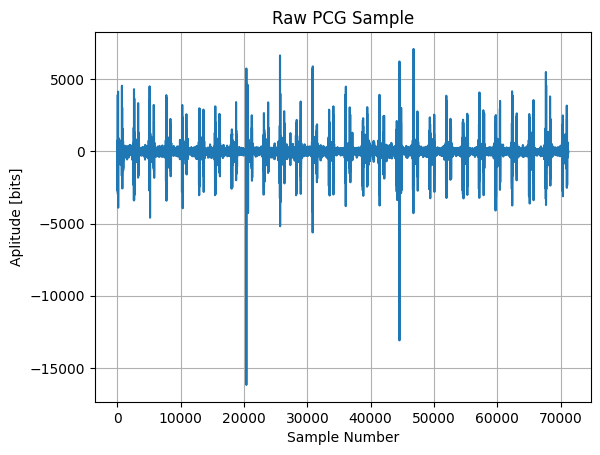

In [4]:
samplerate, original_data, propagated_labels = importlib.import_physionet_2016(directory_signal, directory_labels)

plt.plot(original_data)
plt.grid()
plt.title("Raw PCG Sample")
plt.xlabel("Sample Number")
plt.ylabel("Aplitude [bits]")

### Standardize acquisition

Text(0, 0.5, 'Aplitude')

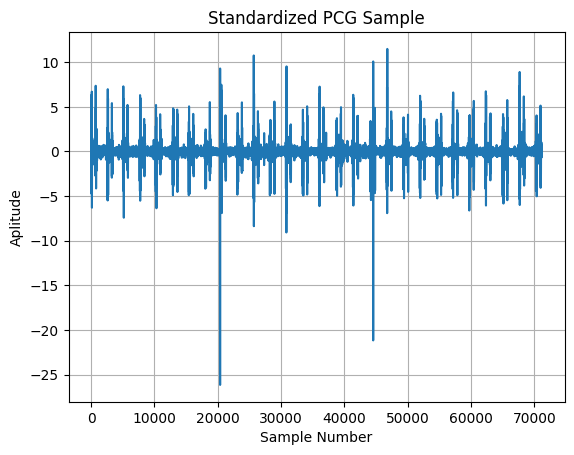

In [5]:
data = np.copy(original_data)
z_norm = pplib.z_score_standardization(data)
plt.plot(z_norm, label='standardized')
plt.grid()
plt.title("Standardized PCG Sample")
plt.xlabel("Sample Number")
plt.ylabel("Aplitude")

### Denoise

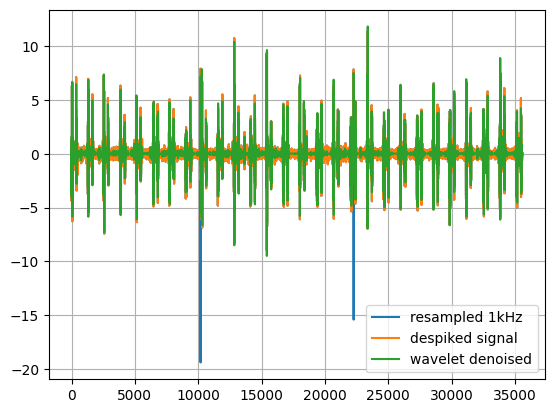

In [6]:
# resample 1k Hz
plt.figure()
resample = pplib.downsample(z_norm, samplerate, 1000)
plt.plot(resample, label='resampled 1kHz')

# Schmidt despiking
despiked_signal = pplib.schmidt_spike_removal(resample, 1000)
plt.plot(despiked_signal, label='despiked signal')

# wavelet denoising
wavelet_denoised = pplib.wavelet_denoise(despiked_signal, 5, wavelet_family='coif4',
                                         risk_estimator=pplib.val_SURE_threshold,
                                         shutdown_bands=[-1])
plt.plot(wavelet_denoised, label='wavelet denoised')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Feature Extraction

Deals with Homomorphic envelope, CWT Envelope using morlet and mexican hat Wavelets, DWT Envelope, and Hilbert Envelope

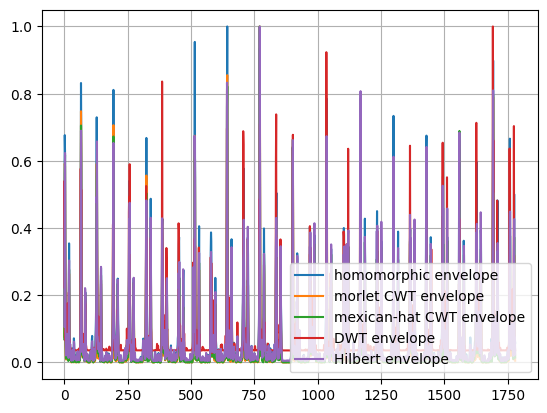

In [7]:
# Homomorphic envelope
plt.figure()
homomorphic = ftelib.homomorphic_envelope(wavelet_denoised, 1000, 50)
plt.plot(homomorphic, label='homomorphic envelope')


# Wavelet envelope
cwt_morl = ftelib.c_wavelet_envelope(wavelet_denoised, 1000, 50)
plt.plot(cwt_morl, label='morlet CWT envelope')

cwt_mexh = ftelib.c_wavelet_envelope(wavelet_denoised, 1000, 50, wv_family='mexh')
plt.plot(cwt_mexh, label='mexican-hat CWT envelope')

dwt = ftelib.d_wavelet_envelope(wavelet_denoised, 1000, 50)
plt.plot(dwt, label='DWT envelope')

hilbert_env = ftelib.hilbert_envelope(wavelet_denoised, 1000, 50)
plt.plot(hilbert_env, label='Hilbert envelope')

plt.grid()
plt.legend(loc='lower right')
plt.show()

### Wait for Miguel Tutorial

(8, 5, 591)

(8, 4, 591)

## U-Net construction